In [1]:
import pandas as pd
from io import StringIO
import requests
import json
import pandas as pd
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from matplotlib import pylab
from sklearn.svm import LinearSVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np
np.random.seed(10) 

%matplotlib inline

In [2]:
# The code was removed by DSX for sharing.

[1 0 2 4 3]


,Material,Usura_mat_g,Durezza_Disco,Comprex_LP,Comprex_LR,Grindo_LP,Grindo_LR,PistoneCpx,Inerzia,Vmax,...,CodImpianto_13.0,CodImpianto_14.0,CodImpianto_15.0,Disco_nuovo_0,Disco_nuovo_1,Disco_256X22,Disco_256x22,Disco_276x24,Disco_280X22,Disco_280x22
0,1,15.2,165,182,182,810,813,54,65,195,...,0,0,0,1,0,0,0,0,1,0
1,0,13.3,177,181,203,738,729,54,65,195,...,0,0,0,1,0,0,0,0,1,0
2,1,7.5,235,125,136,727,731,54,65,195,...,0,0,0,1,0,0,0,0,1,0
3,1,7.8,237,137,102,701,674,54,65,195,...,0,0,0,1,0,0,0,0,1,0
4,1,10.9,180,196,201,820,805,54,65,195,...,0,0,0,1,0,0,0,0,1,0


In [3]:
df_data_2 = pd.read_csv(get_object_storage_file_with_credentials_a860223228054eadb78455bad5266913('ITTProject', 'mapping.csv'), header = None)
print df_data_2.shape
print df_data_2[1].unique()
df_data_2.head()

(482, 2)
[1 2 4 3 0]


,0,1
0,10240,1
1,10241,1
2,10244,1
3,10246,1
4,24583,2


In [4]:
X = df_data_1.drop('Material', axis=1).values
Y = df_data_1['Material'].values

X = (X - X.mean(axis=0))/ X.std(axis=0)


/usr/local/src/bluemix_jupyter_bundle.v43/notebook/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


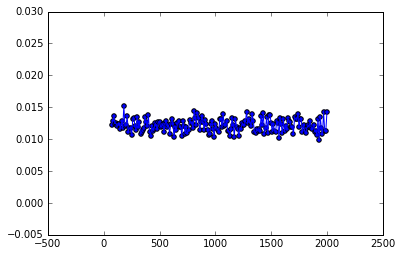

In [5]:
skf = StratifiedKFold(Y, n_folds=4)

C = np.arange(70,2001, 10)
weighted_M = np.zeros(C.shape)
X_train = np.array([])
X_test = np.array([])
y_test = np.array([])
y_train = np.array([])
for train_val_index, test_index in skf:
    X_train, X_test = X[train_val_index], X[test_index]
    y_train, y_test = Y[train_val_index], Y[test_index]

skf_val = StratifiedKFold(y_train, n_folds=4)
for train_idx, val_idx in skf_val:
    X_train_eff, X_val = X_train[train_idx], X_train[val_idx]
    y_train_eff, y_val = y_train[train_idx], y_train[val_idx]
    for c_idx, c in enumerate(C):                             
        linear_ = LinearSVC(penalty='l2', loss='hinge', dual=True, tol=0.0001, C=c,
                multi_class='ovr', fit_intercept=True, intercept_scaling=1,
                    class_weight='balanced', verbose=0, random_state=None, 
                        max_iter=1000).fit(X_train_eff, y_train_eff)
        y_pred = linear_.predict(X_val)
        weighted = f1_score(y_val, y_pred, average='weighted')
        weighted_M[c_idx] = weighted_M[c_idx] + weighted 

weighted_M = weighted_M / C.shape[0]
plt.scatter(C, weighted_M)
plt.plot(C, weighted_M)

In [23]:
skf = StratifiedKFold(Y, n_folds=4)

enc = OneHotEncoder(5)
Y_ohe = pd.get_dummies(Y).values

C = np.arange(70,2001, 10)
weighted_M = np.zeros(C.shape)
X_train = np.array([])
X_test = np.array([])
y_test = np.array([])
y_train = np.array([])
for train_val_index, test_index in skf:
    X_train, X_test = X[train_val_index], X[test_index]
    y_train, y_test = Y_ohe[train_val_index], Y_ohe[test_index]
print "y_train", y_train.shape
print "x_train", X_train.shape
skf_val = StratifiedKFold(y_train[0], n_folds=4)
for train_idx, val_idx in skf_val:
    X_train_eff, X_val = X_train[train_idx], X_train[val_idx]
    y_train_eff, y_val = y_train[train_idx], y_train[val_idx]
    print "x_train_eff", X_train_eff.shape
    print "X_val", X_val.shape
    print "y_train_eff", y_train_eff.shape
    print "y_val", y_val.shape
    for c_idx, c in enumerate(C):          

        linear_ = LinearSVC(penalty='l2', loss='hinge', dual=True, tol=0.0001, C=c,
                multi_class='ovr', fit_intercept=True, intercept_scaling=1,
                    class_weight='balanced', verbose=0, random_state=None, 
                        max_iter=1000).fit(X_train_eff, y_train_eff)
        y_pred = linear_.predict(X_val)
        weighted = log_loss(y_val, y_pred)
        weighted_M[c_idx] = weighted_M[c_idx] + weighted 

weighted_M = weighted_M / C.shape[0]
plt.scatter(C, weighted_M)
plt.plot(C, weighted_M)

y_train (490, 5)
x_train (490, 41)
x_train_eff (3, 41)
X_val (2, 41)
y_train_eff (3, 5)
y_val (2, 5)


ValueError: bad input shape (3, 5)

In [81]:
X = df_data_1.drop('Material', axis=1).values
y = df_data_1['Material'].values
#X = (X - X.min(axis=0))/ (X.max(axis=0) - X.min(axis=0))
K = Y_ohe.shape[1]
D = X.shape[1]

In [85]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-04
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]


In [ ]:
for i in xrange(30000):

    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2

    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss

    if i % 1000 == 0:
        print "iteration %d: loss %f" % (i, loss)

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2

iteration 0: loss 1.767502


In [ ]:

# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print 'training accuracy: %.2f' % (np.mean(predicted_class == y))